# SCAG HIN Network and Census Tracts Overlay
**Author: Gema Martinez Castillo** 

The purpose of this assignment is to be able to identify and map the census tracts that have the highest number of HIN segements. These census tracts will be further analyzed for their demographic qualities to determine if there are commonalities in collision hotspots. 

In [1]:
import pandas as pd
import geopandas as gpd

Importing a new module 'geopandas', a geospatial library, to be able to import spatial data formats and plot them on a map.

In [2]:
scag = gpd.read_file('High_Injury_Network_SCAG.geojson')

Importing the SCAG HIN for mapping 

In [3]:
scag.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5964 entries, 0 to 5963
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   OBJECTID              5964 non-null   int32   
 1   SEGMENT_ID            5964 non-null   object  
 2   SEGMENT_NAME          5964 non-null   object  
 3   CITY                  5964 non-null   object  
 4   COUNTY                5964 non-null   object  
 5   MILE                  5964 non-null   float64 
 6   FATALITY_VICTIM       5964 non-null   float64 
 7   SEVERE_INJURY_VICTIM  5964 non-null   float64 
 8   VICTIM_COUNT          5964 non-null   float64 
 9   HIN_AUTO              5964 non-null   object  
 10  HIN_PED               5964 non-null   object  
 11  HIN_BIKE              5964 non-null   object  
 12  HIN_ALL               5964 non-null   object  
 13  TRANSIT_AREA          5964 non-null   object  
 14  EQUITY_AREA           5964 non-null   object  
 

Reviewing the data to look for long and lat columns, but the data contains a geometry column.

In [4]:
scag.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Making sure that the file is in geographic form by looking for WSG84.

In [5]:
scag.head()

,OBJECTID,SEGMENT_ID,SEGMENT_NAME,CITY,COUNTY,MILE,FATALITY_VICTIM,SEVERE_INJURY_VICTIM,VICTIM_COUNT,HIN_AUTO,HIN_PED,HIN_BIKE,HIN_ALL,TRANSIT_AREA,EQUITY_AREA,YEAR,geometry
0,1,10008,E Adams Ave,Orange,Orange,0.499465,0.0,0.5,0.5,No,Yes,No,Yes,No,Yes,2022,"MULTILINESTRING ((-117.83806 33.80665, -117.83..."
1,2,10140_0,E Balboa Blvd,Newport Beach,Orange,1.002174,0.0,2.5,2.5,No,Yes,No,Yes,No,No,2022,"MULTILINESTRING ((-117.89062 33.59901, -117.88..."
2,3,10140_1,E Balboa Blvd,Newport Beach,Orange,0.543847,0.0,1.0,1.0,Yes,No,No,Yes,No,No,2022,"MULTILINESTRING ((-117.90284 33.6031, -117.902..."
3,4,10145_1,E Ball Rd,Anaheim,Orange,1.098312,0.0,3.0,3.0,Yes,No,No,Yes,Yes,Yes,2022,"MULTILINESTRING ((-117.88851 33.8181, -117.888..."
4,5,10145_2,E Ball Rd,Anaheim,Orange,0.755181,0.0,1.0,1.0,Yes,No,No,Yes,Yes,Yes,2022,"MULTILINESTRING ((-117.89739 33.81809, -117.89..."


Reviewing the data to see which column I want to isolate for future mapping.

In [6]:
scag['COUNTY'].value_counts()

COUNTY
Los_Angeles       3156
Orange             885
Riverside          811
San_Bernardino     706
Ventura            310
Imperial            96
Name: count, dtype: int64

In [7]:
scag['CITY'].value_counts()

CITY
Los Angeles         1490
Unincorporated      1060
Long Beach           172
Riverside             94
Santa Ana             91
                    ... 
Lomita                 1
Hidden Hills           1
Westlake Village       1
South Pasadena         1
La Habra Heights       1
Name: count, Length: 183, dtype: int64

Identifying the unique enteries for city and county. Decided to use county as the basis for mapping. 

In [8]:
lacounty = scag.query("COUNTY == 'Los_Angeles'")

In [9]:
lacounty.head()

,OBJECTID,SEGMENT_ID,SEGMENT_NAME,CITY,COUNTY,MILE,FATALITY_VICTIM,SEVERE_INJURY_VICTIM,VICTIM_COUNT,HIN_AUTO,HIN_PED,HIN_BIKE,HIN_ALL,TRANSIT_AREA,EQUITY_AREA,YEAR,geometry
1901,1902,10000_2,Branford St,Los Angeles,Los_Angeles,1.001868,1.0,3.0,4.0,Yes,No,No,Yes,Yes,Yes,2022,"MULTILINESTRING ((-118.42306 34.23372, -118.42..."
1902,1903,10039_0,Brea Canyon Cut Off Rd,Unincorporated,Los_Angeles,1.054329,1.0,1.0,2.0,Yes,No,No,Yes,No,Yes,2022,"MULTILINESTRING ((-117.85979 33.9772, -117.859..."
1903,1904,10041_2,Brea Canyon Rd,Industry,Los_Angeles,0.594040,0.0,1.0,1.0,Yes,No,No,Yes,Yes,Yes,2022,"MULTILINESTRING ((-117.84232 34.01567, -117.84..."
1904,1905,10123,Brewster Ave,Lynwood,Los_Angeles,0.316811,0.5,0.0,0.5,No,Yes,No,Yes,Yes,Yes,2022,"MULTILINESTRING ((-118.19083 33.9185, -118.189..."
1905,1906,10138,Briar Glen Rd,Unincorporated,Los_Angeles,0.533922,0.0,1.0,1.0,Yes,No,No,Yes,No,No,2022,"MULTILINESTRING ((-118.17195 34.46461, -118.17..."


Queried the data only for Los Angeles County. 

In [10]:
censustracts = gpd.read_file('Census_Tracts_2020.geojson')

<Axes: >

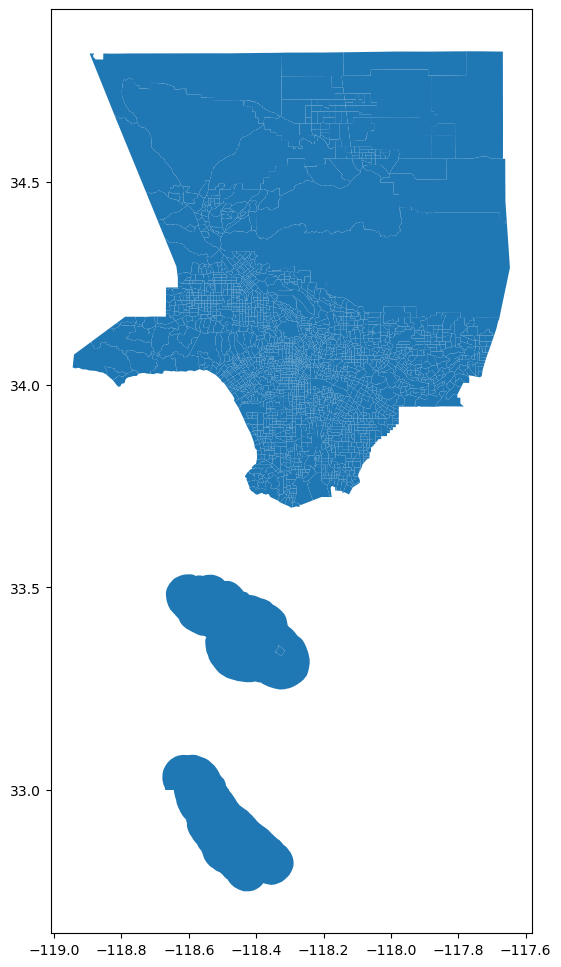

In [11]:
censustracts.plot(figsize=(12,12))

Imported and mapped census tracts that will be merged with the HIN network. 

In [12]:
tracts = censustracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.281 34.25592, -118.28198 34.255..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


Refining data to merge data.

In [13]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Filtering data for LA County tracts. 

In [14]:
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.281 34.25592, -118.28198 34.255...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


Checking that the FIPS column was added to the dataset.

In [15]:
HIN_by_neighborhood = gpd.sjoin(tracts, lacounty)

In [16]:
HIN_by_neighborhood

,CT20,geometry,FIPS,index_right,OBJECTID,SEGMENT_ID,SEGMENT_NAME,CITY,COUNTY,MILE,FATALITY_VICTIM,SEVERE_INJURY_VICTIM,VICTIM_COUNT,HIN_AUTO,HIN_PED,HIN_BIKE,HIN_ALL,TRANSIT_AREA,EQUITY_AREA,YEAR
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,2642,2643,28966_6,Foothill Blvd,Los Angeles,Los_Angeles,1.005715,3.0,6.0,9.0,Yes,Yes,Yes,Yes,No,Yes,2022
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,3113,3114,45568,Mountair Ave,Los Angeles,Los_Angeles,0.640782,1.0,0.0,1.0,Yes,No,No,Yes,No,Yes,2022
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,4193,4194,63289,Silverton Ave,Los Angeles,Los_Angeles,0.278471,0.0,0.5,0.5,Yes,No,No,Yes,No,Yes,2022
2,101220,"POLYGON ((-118.281 34.25592, -118.28198 34.255...",06037101220,2641,2642,28966_5,Foothill Blvd,Los Angeles,Los_Angeles,1.014042,0.0,4.5,4.5,Yes,Yes,No,Yes,No,Yes,2022
2,101220,"POLYGON ((-118.281 34.25592, -118.28198 34.255...",06037101220,4193,4194,63289,Silverton Ave,Los Angeles,Los_Angeles,0.278471,0.0,0.5,0.5,Yes,No,No,Yes,No,Yes,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,980038,"POLYGON ((-118.36674 34.01539, -118.36673 34.0...",06037980038,3430,3431,51119_1,Overhill Dr,Unincorporated,Los_Angeles,0.310307,0.0,2.0,2.0,Yes,No,No,Yes,Yes,Yes,2022
2493,980038,"POLYGON ((-118.36674 34.01539, -118.36673 34.0...",06037980038,4231,4232,64652_4,Stocker St,Unincorporated,Los_Angeles,0.577823,0.0,1.0,1.0,Yes,No,No,Yes,Yes,Yes,2022
2493,980038,"POLYGON ((-118.36674 34.01539, -118.36673 34.0...",06037980038,2165,2166,19505,Don Lorenzo Dr,Los Angeles,Los_Angeles,0.250281,0.0,0.5,0.5,Yes,No,No,Yes,Yes,Yes,2022
2493,980038,"POLYGON ((-118.36674 34.01539, -118.36673 34.0...",06037980038,3844,3845,59287_4,S La Brea Ave,Los Angeles,Los_Angeles,1.420207,3.0,5.5,8.5,No,Yes,No,Yes,Yes,Yes,2022


Joining the cenus tracts with the HIN network. 

In [17]:
HIN_neighborhood_counts = HIN_by_neighborhood.value_counts('FIPS').reset_index(name='hin_count')

In [18]:
HIN_neighborhood_counts

,FIPS,hin_count
0,06037226002,23
1,06037980028,23
2,06037535101,19
3,06037206051,19
4,06037980035,18
...,...,...
2245,06037920109,1
2246,06037106407,1
2247,06037980001,1
2248,06037920343,1


Identifying which census tracts have the most and least HIN segements.  

In [19]:
HIN_by_neighborhood = HIN_by_neighborhood.merge(HIN_neighborhood_counts, how='left', on='FIPS')

In [20]:
HIN_by_neighborhood.sample(10)

,CT20,geometry,FIPS,index_right,OBJECTID,SEGMENT_ID,SEGMENT_NAME,CITY,COUNTY,MILE,...,SEVERE_INJURY_VICTIM,VICTIM_COUNT,HIN_AUTO,HIN_PED,HIN_BIKE,HIN_ALL,TRANSIT_AREA,EQUITY_AREA,YEAR,hin_count
2030,204700,"POLYGON ((-118.21027 34.02604, -118.20994 34.0...",06037204700,3969,3970,60230_0,S Soto St,Los Angeles,Los_Angeles,1.006249,...,4.5,4.5,Yes,Yes,No,Yes,Yes,Yes,2022,4
7829,700901,"POLYGON ((-118.38467 34.06703, -118.38568 34.0...",06037700901,3848,3849,59289_0,S La Cienega Blvd,Beverly Hills,Los_Angeles,1.002257,...,2.5,3.0,No,Yes,No,Yes,Yes,Yes,2022,7
3270,232120,"POLYGON ((-118.2805 33.99649, -118.28066 33.99...",06037232120,3831,3832,59164_5,S Hoover St,Los Angeles,Los_Angeles,1.051540,...,5.0,5.0,Yes,Yes,No,Yes,Yes,Yes,2022,11
1734,191902,"POLYGON ((-118.34161 34.08709, -118.34279 34.0...",06037191902,3231,3232,47362_1,N La Brea Ave,Los Angeles,Los_Angeles,1.019569,...,4.5,5.0,Yes,No,Yes,Yes,Yes,Yes,2022,6
679,123510,"POLYGON ((-118.42253 34.19401, -118.42467 34.1...",06037123510,4969,4970,76752_4,Woodman Ave,Los Angeles,Los_Angeles,1.007040,...,2.5,3.5,Yes,No,No,Yes,Yes,Yes,2022,5
1281,139506,"POLYGON ((-118.52436 34.1646, -118.52436 34.16...",06037139506,2984,2985,40193_1,Lindley Ave,Los Angeles,Los_Angeles,1.002888,...,2.0,2.0,Yes,No,No,Yes,Yes,Yes,2022,3
2483,212303,"POLYGON ((-118.29415 34.05774, -118.29289 34.0...",06037212303,3999,4000,60456_25,S Vermont Ave,Los Angeles,Los_Angeles,1.010231,...,4.0,4.0,No,Yes,No,Yes,Yes,Yes,2022,2
7029,575300,"POLYGON ((-118.18449 33.78986, -118.18504 33.7...",06037575300,3947,3948,6013_11,Atlantic Ave,Long Beach,Los_Angeles,1.002703,...,2.0,2.0,No,No,Yes,Yes,Yes,Yes,2022,6
1397,181500,"POLYGON ((-118.19982 34.13961, -118.20098 34.1...",06037181500,3096,3097,44930,Monte Bonito Dr,Los Angeles,Los_Angeles,0.341039,...,0.5,0.5,No,No,Yes,Yes,Yes,Yes,2022,4
891,127910,"POLYGON ((-118.44 34.19756, -118.44 34.19935, ...",06037127910,4424,4425,69899,Vose St,Los Angeles,Los_Angeles,0.436582,...,1.0,1.0,No,Yes,No,Yes,Yes,Yes,2022,9


Added the count to the HIN table. 

<Axes: >

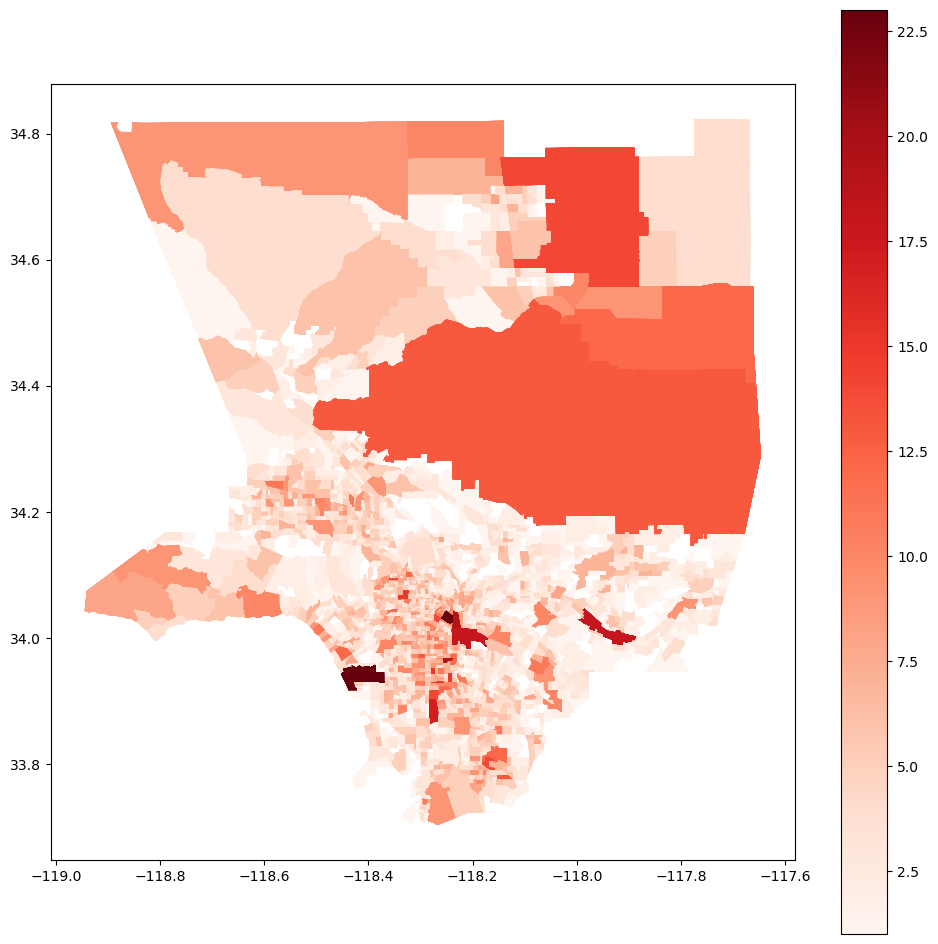

In [21]:
import matplotlib.pyplot as plt
HIN_mapped, ax = plt.subplots(figsize=(12,12))
HIN_by_neighborhood.plot(ax=ax,column='hin_count',legend=True,cmap='Reds')


Mapped which census tracts have the highest and lowest HIN segements. This will serve as the basis for choosing which census tracts to do a demographic analysis on. 